In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patch

In [2]:
images_df = pd.read_csv(r"C:\Users\annao\Documents\Tyska Rotation\20220221 Analysis.csv", encoding='utf-8')
images_df

,Condition,Image,Cell,Slice,Channel,Area,ROI,Mean gray value,Integrated Density,Raw Integrated Density
0,1,100X_W4_+limk3_cofilin-GFP_WGA405_Phallodin647...,1,5,g,Brush border,1,623.538,22253.077,1440373
1,1,100X_W4_+limk3_cofilin-GFP_WGA405_Phallodin647...,1,5,g,Cytoplasm,2,989.966,159154.553,10301583
2,1,100X_W4_+limk3_cofilin-GFP_WGA405_Phallodin647...,1,5,g,Brush border,1,206.841,13082.765,846807
3,1,100X_W4_+limk3_cofilin-GFP_WGA405_Phallodin647...,1,5,g,Cytoplasm,2,206.622,40767.648,2638764
4,1,100X_W4_+limk3_cofilin-GFP_WGA405_Phallodin647...,1,6,g,Brush border,1,154.188,4811.909,311460
...,...,...,...,...,...,...,...,...,...,...
69,6,W4_+limk3_extract_MISP-rfp_WGA405_Phal647_007,1,6,r,Cytoplasm,2,215.639,26402.309,1708940
70,6,W4_+limk3_extract_MISP-rfp_WGA405_Phal647_008,1,10,r,Brush border,1,465.938,34437.746,2229049
71,6,W4_+limk3_extract_MISP-rfp_WGA405_Phal647_008,1,10,r,Cytoplasm,2,138.198,27220.207,1761880
72,6,W4_+limk3_extract_MISP-rfp_WGA405_Phal647_008,2,10,r,Brush border,3,689.614,22352.541,1446811


In [3]:
### checked length of tmp to confirm all grouped objects are 2 rows
#if len(tmp)!=2:
# print (tmp)
processed_df = pd.DataFrame(columns=['Condition', 'Channel', 'Div_Value']) ## empty df appending to later
g = images_df.groupby(['Condition', 'Image', 'Cell', 'Channel'])
keys_list = list(g.groups.keys())
for key in keys_list:
    tmp = g.get_group(key) 
    div_value = tmp['Mean gray value'].iloc[0]/ tmp['Mean gray value'].iloc[1]
    processed_df = processed_df.append({'Condition': key[0], 'Channel': key[3], 'Div_Value': div_value}, ignore_index=True)
processed_df

,Condition,Channel,Div_Value
0,1,g,0.629858
1,1,g,1.001060
2,1,g,0.914747
3,1,g,0.867375
4,1,g,1.117695
5,2,g,0.415560
6,2,g,0.779340
7,2,g,0.484327
8,3,g,0.894679
9,3,r,1.887795


In [4]:
green_diamond = dict(markerfacecolor='b', marker='.', alpha=0.08)
red= dict(color='r')
blue= dict(color='b')
#label=['WT cofilin','WT cofilin (permeabilized)', 'WT cofilin (WT cofilin + MISP)', 'MISP (WT cofilin + MISP)', 'WT cofilin (WT cofilin + MISP, permeabilized)', 'MISP (WT cofilin + MISP, permeabilized)','MISP', 'MISP (permeabilized)']

g_2 = processed_df.groupby(['Condition', 'Channel'])
#a=g_2.describe().head()
#print(a)
#g_2.get_groups.keys()
# d.index.names=['g']
print(list(g_2.groups.keys()))





[(1, 'g'), (2, 'g'), (3, 'g'), (3, 'r'), (4, 'g'), (4, 'r'), (5, 'r'), (6, 'r')]


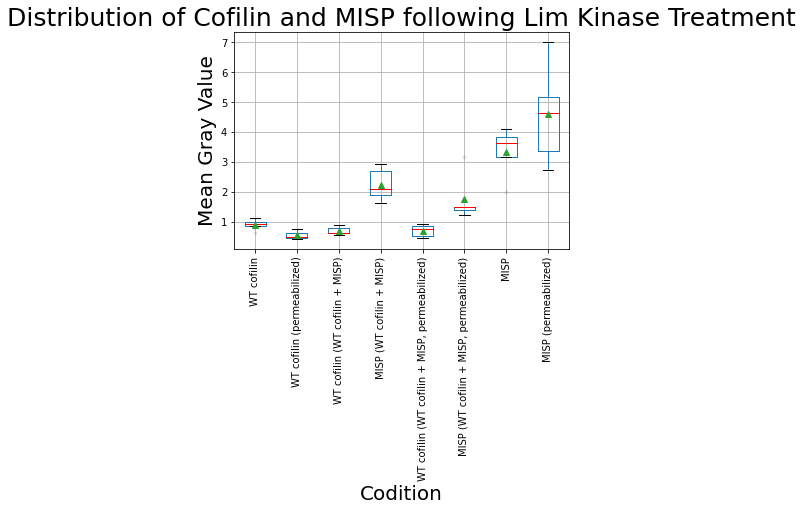

In [7]:
green_diamond = dict(markerfacecolor='b', marker='.', alpha=0.08)
red= dict(color='r')
blue= dict(color='b')
#label=['WT cofilin','WT cofilin (permeabilized)', 'WT cofilin (WT cofilin + MISP)', 'MISP (WT cofilin + MISP)', 'WT cofilin (WT cofilin + MISP, permeabilized)', 'MISP (WT cofilin + MISP, permeabilized)','MISP', 'MISP (permeabilized)']
#lst=['1','2', '3', '4', '5', '6', '7','8']
g_2 = processed_df.groupby(['Condition', 'Channel'])

ax = g_2.boxplot(showmeans= True, subplots=False, rot=90, flierprops=green_diamond, medianprops=red, meanprops=blue)
ax.set_title('Distribution of Cofilin and MISP following Lim Kinase Treatment', fontsize=25)
ax.set_xlabel('Codition', fontsize=20)
ax.set_ylabel('Mean Gray Value', fontsize=20)
#plt.xticks([(1, 'g'), (2, 'g'), (3, 'g'), (3, 'r'), (4, 'g'), (4, 'r'), (5, 'r'), (6, 'r')], ['WT cofilin','WT cofilin (permeabilized)', 'WT cofilin (WT cofilin + MISP)', 'MISP (WT cofilin + MISP)', 'WT cofilin (WT cofilin + MISP, permeabilized)', 'MISP (WT cofilin + MISP, permeabilized)','MISP', 'MISP (permeabilized)'])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['WT cofilin','WT cofilin (permeabilized)', 'WT cofilin (WT cofilin + MISP)', 'MISP (WT cofilin + MISP)', 'WT cofilin (WT cofilin + MISP, permeabilized)', 'MISP (WT cofilin + MISP, permeabilized)','MISP', 'MISP (permeabilized)'])
# plt.savefig('Boxplot of Velocity Distributions cell 254.jpg', dpi=300, bbox_inches='tight')
plt.show()

# labels=['WT cofilin','WT cofilin (WT cofilin + MISP)', 'MISP (WT cofilin + MISP)', 'MISP', 'S3A cofilin (S3A cofilin + MISP)','MISP(S3A cofilin + MISP)','S3A cofilin', 'S3E cofilin (S3E cofilin + MISP)', 'S3E cofilin','MISP(S3E cofilin + MISP)']

#labels=['WT cofilin','WT cofilin (WT cofilin + MISP)', 'MISP (WT cofilin + MISP)', 'MISP', 'S3A cofilin (S3A cofilin + MISP)','MISP(S3A cofilin + MISP)','S3A cofilin', 'S3E cofilin (S3E cofilin + MISP)', 'S3E cofilin','MISP(S3E cofilin + MISP)']

#fig, ax = plt.subplots()


# plt.xticks(rotation = 90)
# AX= ax.boxplot(data, showmeans=True, labels= labels, flierprops=green_diamond, medianprops=red, meanprops=blue)

# plt.savefig('Boxplot of Velocity Distributions cell 254.jpg', dpi=300, bbox_inches='tight')
# plt.show()

In [ ]:

#I want a way to differentiate each condition
# some images are the start of new conditons, but others are contiuations of the previous


#I need to differentiate based on #1 conditon (1-7) , #2 channel (gfp vs rfp), #3 area (brush border vs cytoplasm)
# then I want to divide brush border by cytoplasm for a given condition and channel and for the same cell
# but since they're ordered anyway it should be like brush border 1/cytoplasm 1

#1 the following specifiy condition in the sheet (column 1 = condition) --> [0]
    # 1 = WT cofilin 
    # 2 = WT cofilin + MISP
    # 3 = MISP
    # 4 = S3A cofilin + MISP
    # 5 = S3A cofilin
    # 6 = S3E cofilin + MISP
    # 7 = S3E cofilin
 #2 channel --> [4]
    # RFP
    #GFP
# 3 area --> [5]
    # Brush border
    # Cytoplasm
# 4 gray area --> [7]
    

t1bb=[]
t1c=[]
t2rbb=[]
t2rc = []
t2gbb=[]
t2gc=[]
t3bb=[]
t3c=[]
t4rbb=[]
t4rc=[]
t4gbb=[]
t4gc=[]
t5bb=[]
t5c=[]
t6rbb=[]
t6rc=[]
t6gbb=[]
t6gc=[]
t7bb=[]
t7c=[]

with open (r'C:\Users\annao\Documents\Tyska Rotation\20220211 & 20220214 Analysis edit.csv','r') as image_data:
    header=image_data.readline()
    for line in image_data:
        data=line.rstrip().split(',')
        if data[0]=='1':
            if data [4]=='GFP':
                if data [5]=='Brush border':
                    t1bb.append(float(data[7]))
                elif data [5]=='Cytoplasm ':
                    t1c.append(float(data[7]))
        elif data[0]=='2':
            if data [4]=='GFP':
                if data [5]=='Brush border':
                    t2gbb.append(float(data[7]))
                elif data [5]=='Cytoplasm ':
                    t2gc.append(float(data[7]))
            elif data [4]=='RFP':
                if data [5]=='Brush border':
                    t2rbb.append(float(data[7]))
                elif data [5]=='Cytoplasm ':
                    t2rc.append(float(data[7]))
        elif data[0]=='3':
            if data [4]=='RFP':
                if data [5]=='Brush border':
                    t3bb.append(float(data[7]))
                elif data [5]=='Cytoplasm ':
                    t3c.append(float(data[7]))
        elif data[0]=='4':
            if data [4]=='GFP':
                if data [5]=='Brush border':
                    t4gbb.append(float(data[7]))
                elif data [5]=='Cytoplasm ':
                    t4gc.append(float(data[7]))
            elif data [4]=='RFP':
                if data [5]=='Brush border':
                    t4rbb.append(float(data[7]))
                elif data [5]=='Cytoplasm ':
                    t4rc.append(float(data[7]))
        elif data[0]=='5':
            if data [4]=='GFP':
                if data [5]=='Brush border':
                    t5bb.append(float(data[7]))
                elif data [5]=='Cytoplasm ':
                    t5c.append(float(data[7]))
        elif data[0]=='6':
            if data [4]=='GFP':
                if data [5]=='Brush border':
                    t6gbb.append(float(data[7]))
                elif data [5]=='Cytoplasm ':
                    t6gc.append(float(data[7]))
            elif data [4]=='RFP':
                if data [5]=='Brush border':
                    t6rbb.append(float(data[7]))
                elif data [5]=='Cytoplasm ':
                    t6rc.append(float(data[7]))
        elif data[0]=='7':
            if data [4]=='GFP':
                if data [5]=='Brush border':
                    t7bb.append(float(data[7]))
                elif data [5]=='Cytoplasm ':
                    t7c.append(float(data[7]))
        else:
            end

            
#now I want to divide bb #1/c #1
t1bb_t1c=[]
t2rbb_t2rc = []
t2gbb_t2gc=[]
t3bb_t3c=[]
t4rbb_t4rc=[]
t4gbb_t4gc=[]
t5bb_t5c=[]
t6rbb_t6rc=[]
t6gbb_t6gc=[]
t7bb_t7c=[]


# division of lists using map()
from operator import truediv
res1 = list(map(truediv, t1bb, t1c))
t1bb_t1c.append(res1)

res2 = list(map(truediv, t2rbb, t2rc))
t2rbb_t2rc.append(res2)

res3 = list(map(truediv, t2gbb, t2gc))
t2gbb_t2gc.append(res3)

res4 = list(map(truediv, t3bb, t3c))
t3bb_t3c.append(res4)

res5 = list(map(truediv, t4rbb, t4rc))
t4rbb_t4rc.append(res5)

res6 = list(map(truediv, t4gbb, t4gc))
t4gbb_t4gc.append(res6)

res7 = list(map(truediv, t5bb, t5c))
t5bb_t5c.append(res7)

res8 = list(map(truediv, t6rbb, t6rc))
t6rbb_t6rc.append(res8)

res9 = list(map(truediv, t6gbb, t6gc))
t6gbb_t6gc.append(res9)      

res10 = list(map(truediv, t7bb, t7c))
t7bb_t7c.append(res10)

In [ ]:
print(t1bb_t1c)
print(t2rbb_t2rc)
print(t2gbb_t2gc)
print(t3bb_t3c)
print(t4rbb_t4rc)
print(t4gbb_t4gc)
print(t5bb_t5c)
print(t6rbb_t6rc)
print(t6gbb_t6gc)
print(t7bb_t7c)

In [ ]:
for i in t1:
    t1_d.append(t1[i]/(t1[i+1]) for i in range(0,len(t1),2))

In [ ]:
print(t1bb)
print(t1c)
print(t2rbb)
print(t2rc)
print(t2gbb)
print(t2gc)
print(t3bb)
print(t3c)
print(t4rbb)
print(t4rc)
print(t4gbb)
print(t4gc)
print(t5bb)
print(t5c)
print(t6rbb)
print(t6rc)
print(t6gbb)
print(t6gc)
print(t7bb)
print(t7c)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patch

x1= t1bb_t1c
x2= t2rbb_t2rc 
x3= t2gbb_t2gc
x4= t3bb_t3c
x5= t4rbb_t4rc
x6= t4gbb_t4gc
x7= t5bb_t5c
x8= t6rbb_t6rc
x9= t6gbb_t6gc
x10= t7bb_t7c

    # 1 = WT cofilin 
    # 2 = WT cofilin + MISP
    # 3 = MISP
    # 4 = S3A cofilin + MISP
    # 5 = S3A cofilin
    # 6 = S3E cofilin + MISP
    # 7 = S3E cofilin

import numpy as np
x1_array = np.array(t1bb_t1c)
x2_array = np.array(t2rbb_t2rc)
x3_array = np.array(t2gbb_t2gc)
x4_array = np.array(t3bb_t3c)
x5_array = np.array(t4rbb_t4rc)
x6_array = np.array(t4gbb_t4gc)
x7_array = np.array(t5bb_t5c)
x8_array = np.array(t6rbb_t6rc)
x9_array = np.array(t6gbb_t6gc)
x10_array = np.array(t7bb_t7c)

import seaborn as sns
green_diamond = dict(markerfacecolor='b', marker='.', alpha=0.08)
red= dict(color='r')
blue= dict(color='b')
labels=['WT cofilin','WT cofilin (WT cofilin + MISP)', 'MISP (WT cofilin + MISP)', 'MISP', 'S3A cofilin (S3A cofilin + MISP)','MISP(S3A cofilin + MISP)','S3A cofilin', 'S3E cofilin (S3E cofilin + MISP)', 'S3E cofilin','MISP(S3E cofilin + MISP)']
data = [x1_array.flatten(), x3_array.flatten(), x2_array.flatten(), x4_array.flatten(), x6_array.flatten(),
        x5_array.flatten(), x7_array.flatten(), x9_array.flatten(), x8_array.flatten(), x10_array.flatten()]
fig, ax = plt.subplots()
ax.set_title('Distribution of Cofilin and MISP', fontsize=25)
ax.set_xlabel('Codition', fontsize=15)
ax.set_ylabel('Mean Gray Value', fontsize=15)

plt.xticks(rotation = 90)
AX= ax.boxplot(data, showmeans=True, labels= labels, flierprops=green_diamond, medianprops=red, meanprops=blue)

plt.savefig('Boxplot of Velocity Distributions cell 254.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
from scipy import stats
stats.kruskal(x1_array.flatten(), x3_array.flatten(), x2_array.flatten(), x4_array.flatten(), x6_array.flatten(),
        x5_array.flatten(), x7_array.flatten(), x9_array.flatten(), x8_array.flatten(), x10_array.flatten())

In [ ]:
from scipy import stats
stats.ttest_ind(x5_array.flatten(), x6_array.flatten())

In [ ]:
isinstance (t1bb_t1c, list)

In [ ]:
import numpy as np
x5_array.ndim